# The Curse of Dimensionality - Lab

## Introduction

In this lab, you'll conduct some mathematical simulations to further investigate the consequences of the curse of dimensionality.

## Objectives

In this lab you will: 

- Create and interpret a visual demonstrating how sparsity changes with n for n-dimensional spaces 
- Demonstrate how training time increases exponentially as the number of features increases


## Sparseness in N-Dimensional Space

As discussed, points in n-dimensional space become increasingly sparse as the number of dimensions increases. To demonstrate this, you'll write a function to calculate the Euclidean distance between two points. From there, you'll then generate random points in n-dimensional space, calculate their average distance from the origin, and plot the relationship between this average distance and n.

## Euclidean Distance

To start, write a function which takes two points, p1 and p2, and returns the Euclidean distance between them. Recall that the Euclidean distance between two points is given by:  

$$ d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2} $$

In [1]:
import numpy as np

In [2]:
def euclidean_distance(p1, p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    return np.sqrt(sum((p1 - p2)**2))

## Average Distance From the Origin

To examine the curse of dimensionality, you'll investigate the average distance to the center of n-dimensional space. As you'll see, this average distance increases as the number of dimensions increases. To investigate this, generate 100 random points for various n-dimensional spaces. Investigate n-dimensional spaces from n=1 to n=1000. In each of these, construct the 100 random points using a random number between -10 and 10 for each dimension of the point. From there, calculate the average distance from each of these points to the origin. Finally, plot this relationship on a graph; the x-axis will be n, the number of dimensions, and the y-axis will be the average distance from the origin.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
# Your code here
dimensions = np.arange(1,1001)
avg_distances = []

for d in dimensions:
    origin = np.zeros(d)
    pts = [np.random.uniform(low=-10, high=10, size=d) for i in range(100)]
    avg_distances.append(np.mean([euclidean_distance(origin, pt) for pt in pts]))

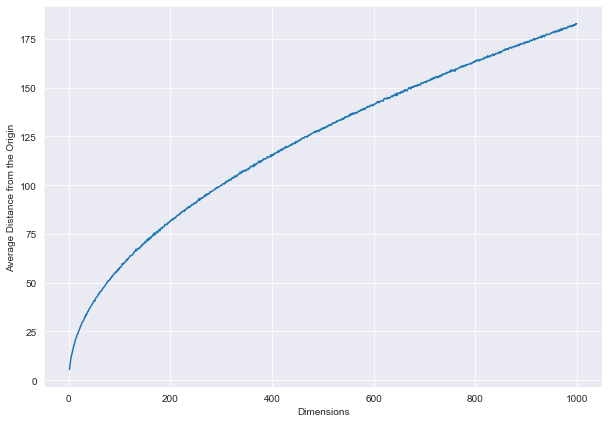

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(dimensions, avg_distances)
plt.xlabel('Dimensions')
plt.ylabel('Average Distance from the Origin')
plt.show();

## Convergence Time

As mentioned before, another issue with increasing the dimension of the feature space is the training time required to fit a machine learning model. While more data will generally lead to better predictive results, it will also substantially increase training time. To demonstrate this, generate lists of random numbers as you did above. Then, use this list of random numbers as a feature in a mock dataset; choose an arbitrary coefficient and multiply the feature vector by this coefficient. Then, sum these feature-coefficient products to get an output, `y`. To spice things up (and not have a completely deterministic relationship), add a normally distributed white noise parameter to your output values. Fit an ordinary least squares model to your generated mock data. Repeat this for a varying number of features, and record the time required to fit the model. (Be sure to only record the time to train the model, not the time to generate the data.) Finally, plot the number of features, n, versus the training time for the subsequent model.

In [6]:
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression, Lasso

In [10]:
np.random.uniform(low=-10, high=10, size=3)

array([-4.32686478,  8.24185967,  1.65982822])

In [12]:
np.random.uniform(size=3)

array([0.14740465, 0.78756465, 0.1288415 ])

In [16]:
np.array([1,2,3]) + np.array([4,5,6])

array([5, 7, 9])

In [19]:
# ⏰ Your code may take some time to run

sample_size = 10**3
dimensions = np.arange(1,1001)
avg_distances = []
times = []

for d in dimensions:
    # generate random coefficient vector
    coefs = np.random.uniform(size=d)
    
    # generate random values for X
    X = [np.random.uniform(low=-10, high=10, size=d) for i in range(sample_size)]
    
    # calculate y (including white noise)
    y = np.array([np.dot(coefs, x_i) for x_i in X]) + np.random.normal(loc=0, scale=0.1, size=sample_size)
    
    ols = LinearRegression()
    # get start time
    start = datetime.datetime.now()
    # fit ols to X and y
    ols.fit(X, y)
    # get end time
    end = datetime.datetime.now()
    
    # get training time & append to 'times' list
    duration = end - start
    times.append(duration)

In [23]:
times[0].total_seconds()

0.002279

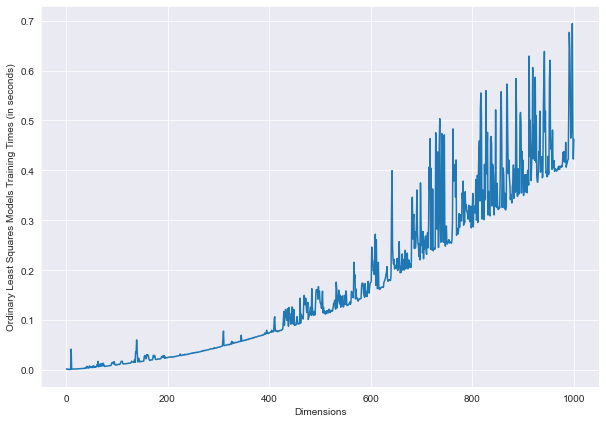

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(dimensions, [t.total_seconds() for t in times])
plt.xlabel('Dimensions')
plt.ylabel('Ordinary Least Squares Models Training Times (in seconds)')
plt.show();

- Repeat the same experiment for a Lasso penalized regression model

In [25]:
# ⏰ Your code may take some time to run 

sample_size = 10**3
dimensions = np.arange(1,1001)
avg_distances = []
times = []

for d in dimensions:
    # generate random coefficient vector
    coefs = np.random.uniform(size=d)
    
    # generate random values for X
    X = [np.random.uniform(low=-10, high=10, size=d) for i in range(sample_size)]
    
    # calculate y (including white noise)
    y = np.array([np.dot(coefs, x_i) for x_i in X]) + np.random.normal(loc=0, scale=0.1, size=sample_size)
    
    lasso = Lasso()
    # get start time
    start = datetime.datetime.now()
    # fit ols to X and y
    lasso.fit(X, y)
    # get end time
    end = datetime.datetime.now()
    
    # get training time & append to 'times' list
    duration = end - start
    times.append(duration)

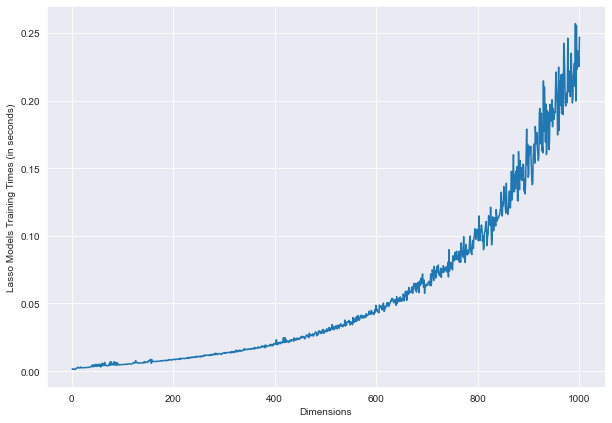

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(dimensions, [t.total_seconds() for t in times])
plt.xlabel('Dimensions')
plt.ylabel('Lasso Models Training Times (in seconds)')
plt.show();

## Optional (Level Up)

### Show Just How Slow it Can Go!

If you're up for putting your computer through the wringer and are very patient to allow the necessary computations, try increasing the maximum n from 1000 to 10,000 using Lasso regression. You should see an interesting pattern unveil. See if you can make any hypotheses as to why this might occur!

_Note:_ ⏰ _You can expect your code to take over an hour to run on a 2.7 GHz speed CPU!_

In [ ]:
# ⏰ Your code may take some time to run 
sample_size = 10**3
dimensions = np.arange(1,10001)
avg_distances = []
times = []

for d in dimensions:
    # generate random coefficient vector
    coefs = np.random.uniform(size=d)
    
    # generate random values for X
    X = [np.random.uniform(low=-10, high=10, size=d) for i in range(sample_size)]
    
    # calculate y (including white noise)
    y = np.array([np.dot(coefs, x_i) for x_i in X]) + np.random.normal(loc=0, scale=0.1, size=sample_size)
    
    lasso = Lasso()
    # get start time
    start = datetime.datetime.now()
    # fit ols to X and y
    lasso.fit(X, y)
    # get end time
    end = datetime.datetime.now()
    
    # get training time & append to 'times' list
    duration = end - start
    times.append(duration)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2941.0102384446873, tolerance: 2599.133094852909
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2893.00572855513, tolerance: 2347.77680999552
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3170.616562508523, tolerance: 2575.7794141456498
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklear

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3187.8448049550207, tolerance: 2872.781792407986
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3030.2371265108304, tolerance: 2881.972090952485
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3421.00993585986, tolerance: 3018.4631943743225
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/skle

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3346.6647413789397, tolerance: 3124.1970041089435
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3324.1295949008963, tolerance: 3039.5763745860245
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3775.2101722585103, tolerance: 3104.3625458140846
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3235.802267342886, tolerance: 3205.122751835918
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3604.725124822202, tolerance: 3332.9701080619557
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3502.5014676312385, tolerance: 3211.668773041629
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/skle

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(dimensions, [t.total_seconds() for t in times])
plt.xlabel('Dimensions')
plt.ylabel('Lasso Models Training Times (in seconds)')
plt.show();

## Summary

In this lab, you conducted various simulations to investigate the curse of dimensionality. This demonstrated some of the caveats of working with large datasets with an increasing number of features. With that, the next section will explore principal component analysis, a means of reducing the number of features in a dataset while preserving as much information as possible.